In [6]:
import xarray as xr

## Load Raster

In [7]:
ds = xr.open_dataset("../dataset/copernicus_marine/cmems_mod_glo_phy_anfc_0.083deg_P1D-m-2021-09_2021-10.nc")
ds

<xarray.Dataset> Size: 296MB
Dimensions:    (time: 32, latitude: 469, longitude: 493)
Coordinates:
  * latitude   (latitude) float32 2kB -40.0 -39.92 -39.83 ... -1.167 -1.083 -1.0
  * longitude  (longitude) float32 2kB 19.0 19.08 19.17 ... 59.83 59.92 60.0
  * time       (time) datetime64[ns] 256B 2021-09-30 2021-10-01 ... 2021-10-31
Data variables:
    zos        (time, latitude, longitude) float32 30MB ...
    pbo        (time, latitude, longitude) float32 30MB ...
    tob        (time, latitude, longitude) float32 30MB ...
    sob        (time, latitude, longitude) float32 30MB ...
    siconc     (time, latitude, longitude) float32 30MB ...
    sithick    (time, latitude, longitude) float32 30MB ...
    sisnthick  (time, latitude, longitude) float32 30MB ...
    ist        (time, latitude, longitude) float32 30MB ...
    usi        (time, latitude, longitude) float32 30MB ...
    vsi        (time, latitude, longitude) float32 30MB ...
Attributes:
    Conventions:               CF-1.8
    area:                      Global
    contact:                   https://marine.copernicus.eu/contact
    credit:                    E.U. Copernicus Marine Service Information (CM...
    institution:               Mercator Ocean International
    licence:                   http://marine.copernicus.eu/services-portfolio...
    producer:                  CMEMS - Global Monitoring and Forecasting Centre
    references:                http://marine.copernicus.eu
    source:                    MOI GLO12
    title:                     daily mean fields from Global Ocean Physics An...
    copernicusmarine_version:  1.0.4

In [8]:
ds.coords

Coordinates:
  * latitude   (latitude) float32 2kB -40.0 -39.92 -39.83 ... -1.167 -1.083 -1.0
  * longitude  (longitude) float32 2kB 19.0 19.08 19.17 ... 59.83 59.92 60.0
  * time       (time) datetime64[ns] 256B 2021-09-30 2021-10-01 ... 2021-10-31

In [34]:
list(ds.keys())

['zos',
 'pbo',
 'tob',
 'sob',
 'siconc',
 'sithick',
 'sisnthick',
 'ist',
 'usi',
 'vsi']

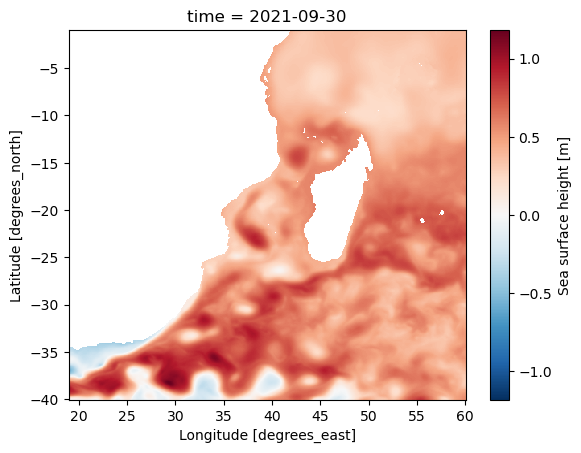

In [9]:
ds.zos[0].plot()

In [14]:
ds.sel(time="2021-09-30")["zos"]

<xarray.DataArray 'zos' (latitude: 469, longitude: 493)> Size: 925kB
[231217 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 2kB -40.0 -39.92 -39.83 ... -1.167 -1.083 -1.0
  * longitude  (longitude) float32 2kB 19.0 19.08 19.17 ... 59.83 59.92 60.0
    time       datetime64[ns] 8B 2021-09-30
Attributes:
    cell_methods:   area: mean
    long_name:      Sea surface height
    standard_name:  sea_surface_height_above_geoid
    unit_long:      Meters
    units:          m
    valid_max:      5.0
    valid_min:      -5.0

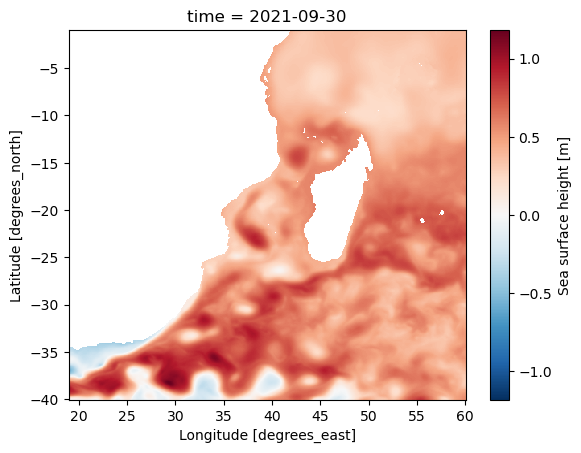

In [15]:
ds.sel(time="2021-09-30")["zos"].plot()

## Load Polygon

In [16]:
import geopandas as gpd

In [17]:
grid_df = gpd.read_file("../dataset/shp/grid_rect_03deg_poly_segments.shp")
grid_df.head()

,MINX,MINY,MAXX,MAXY,CNTX,CNTY,AREA,PERIM,HEIGHT,WIDTH,id,left,top,right,bottom,id_2,geometry
0,20.614758,-38.436792,142.46291,-3.363676,81.538834,-20.900234,4273.594369,313.842536,35.073116,121.848152,13398.0,52.014758,-3.863676,52.314758,-4.163676,1,"POLYGON ((52.31476 -4.16368, 52.01476 -4.16368..."
1,20.614758,-38.436792,142.46291,-3.363676,81.538834,-20.900234,4273.594369,313.842536,35.073116,121.848152,13399.0,52.014758,-4.163676,52.314758,-4.463676,1,"POLYGON ((52.31476 -4.46368, 52.01476 -4.46368..."
2,20.614758,-38.436792,142.46291,-3.363676,81.538834,-20.900234,4273.594369,313.842536,35.073116,121.848152,13392.0,51.714758,-39.263676,52.014758,-39.563676,1,"POLYGON ((51.71476 -39.26368, 52.01476 -39.263..."
3,20.614758,-38.436792,142.46291,-3.363676,81.538834,-20.900234,4273.594369,313.842536,35.073116,121.848152,13393.0,52.014758,-2.363676,52.314758,-2.663676,1,"POLYGON ((52.31476 -2.66368, 52.01476 -2.66368..."
4,20.614758,-38.436792,142.46291,-3.363676,81.538834,-20.900234,4273.594369,313.842536,35.073116,121.848152,13394.0,52.014758,-2.663676,52.314758,-2.963676,1,"POLYGON ((52.31476 -2.96368, 52.01476 -2.96368..."


<Axes: >

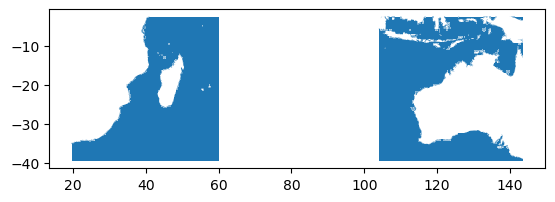

In [18]:
grid_df.plot()

In [19]:
grid_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20675 entries, 0 to 20674
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MINX      20675 non-null  float64 
 1   MINY      20675 non-null  float64 
 2   MAXX      20675 non-null  float64 
 3   MAXY      20675 non-null  float64 
 4   CNTX      20675 non-null  float64 
 5   CNTY      20675 non-null  float64 
 6   AREA      20675 non-null  float64 
 7   PERIM     20675 non-null  float64 
 8   HEIGHT    20675 non-null  float64 
 9   WIDTH     20675 non-null  float64 
 10  id        20675 non-null  float64 
 11  left      20675 non-null  float64 
 12  top       20675 non-null  float64 
 13  right     20675 non-null  float64 
 14  bottom    20675 non-null  float64 
 15  id_2      20675 non-null  int64   
 16  geometry  20675 non-null  geometry
dtypes: float64(15), geometry(1), int64(1)
memory usage: 2.7 MB


## Zonal Statistics

In [20]:
import json
import rasterio
from rasterstats import zonal_stats

In [24]:
zonal_mask = grid_df["geometry"]
zonal_values = ds.sel(time="2021-09-30")["zos"].values
crs_affine = rasterio.Affine(0.25, 0.0, 18.875, 0.0, -0.25, -0.875) # derived from EPSG:4326

In [25]:
staaaa = zonal_stats(zonal_mask, zonal_values, affine=crs_affine, stats=["count", "min", "max", "mean", "median", "std", "range"])

/home/fahmi/.mambaforge/envs/thesis/lib/python3.12/site-packages/rasterstats/io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [ ]:
with open("out.json", "w") as f:
    json.dump(staaaa, f)